<a href="https://colab.research.google.com/github/ShubhamSupare/Global_Terrorism_Data-Analysis/blob/main/Global_Terrorism_Analysis_by_Shubham_Supare_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> <font color='blue'> Problem Statement: </font> </h1>**

# <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>






In [103]:
#mount google drive

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Let's import our weapons (libraries)**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Import warnings and set it to ignore to just ignore all the warnings

In [106]:
# Import the dataset

df = pd.read_csv("/content/drive/MyDrive/Copy of Global Terrorism Data.csv", encoding="ISO 8859-1")

In [107]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [108]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [109]:
df.shape

(181691, 135)



*   We can see that the data has 135 columns, we can keep the necessary columns for our analysis



In [110]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [111]:
# select the columns for analysis
df=df[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "location", "summary","success", "attacktype1_txt", "targtype1_txt", "gname","weaptype1_txt", "nkill", "nwound"]]

In [112]:
# Rename the column for better understanding
df=df.rename(columns={"iyear": "year", "imonth":"month", "iday":"day", "country_txt":"country", "region_txt":"region", "provstate":"state", "city":"city", "location":"location", "summary":"summary","success":"success_rate", "attacktype1_txt":"attacktype", "targtype1_txt":"target", "gname":"terrorist_organization","weaptype1_txt":"weapon", "nkill":"killed", "nwound":"wounded"})

In [113]:
df.head()

,year,month,day,country,region,state,city,location,summary,success_rate,attacktype,target,terrorist_organization,weapon,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,1,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [114]:
df.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'location', 'summary', 'success_rate', 'attacktype', 'target',
       'terrorist_organization', 'weapon', 'killed', 'wounded'],
      dtype='object')



##**Handle Null Values**





In [115]:
df.isnull().sum()

year                           0
month                          0
day                            0
country                        0
region                         0
state                        421
city                         434
location                  126196
summary                    66129
success_rate                   0
attacktype                     0
target                         0
terrorist_organization         0
weapon                         0
killed                     10313
wounded                    16311
dtype: int64


*   Location and summary have maximum number of null values and we can remove that from our Analysis.

In [116]:
df=df.drop(["summary", "location"], axis=1)

In [117]:
df.isnull().any()

year                      False
month                     False
day                       False
country                   False
region                    False
state                      True
city                       True
success_rate              False
attacktype                False
target                    False
terrorist_organization    False
weapon                    False
killed                     True
wounded                    True
dtype: bool

In [118]:
df.isnull().sum()

year                          0
month                         0
day                           0
country                       0
region                        0
state                       421
city                        434
success_rate                  0
attacktype                    0
target                        0
terrorist_organization        0
weapon                        0
killed                    10313
wounded                   16311
dtype: int64



*   We still have four columns with Null values, let's deal with them.



In [119]:
# replace Null values with 0 and "Unknown"
df["state"]=df["state"].fillna("Unknown")
df["city"]=df["city"].fillna("Unknown")
df["killed"]=df["killed"].fillna(0)
df["wounded"]=df["wounded"].fillna(0)


In [120]:
df.isnull().sum()

year                      0
month                     0
day                       0
country                   0
region                    0
state                     0
city                      0
success_rate              0
attacktype                0
target                    0
terrorist_organization    0
weapon                    0
killed                    0
wounded                   0
dtype: int64



*   Now, we have zero Null values.





In [121]:
df.head()

,year,month,day,country,region,state,city,success_rate,attacktype,target,terrorist_organization,weapon,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    181691 non-null  int64  
 1   month                   181691 non-null  int64  
 2   day                     181691 non-null  int64  
 3   country                 181691 non-null  object 
 4   region                  181691 non-null  object 
 5   state                   181691 non-null  object 
 6   city                    181691 non-null  object 
 7   success_rate            181691 non-null  int64  
 8   attacktype              181691 non-null  object 
 9   target                  181691 non-null  object 
 10  terrorist_organization  181691 non-null  object 
 11  weapon                  181691 non-null  object 
 12  killed                  181691 non-null  float64
 13  wounded                 181691 non-null  float64
dtypes: float64(2), int64

In [123]:
# let's change the datatype of "killed" and "wounded" columns

df['killed']=df['killed'].astype('int')
df['wounded']=df['wounded'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   year                    181691 non-null  int64 
 1   month                   181691 non-null  int64 
 2   day                     181691 non-null  int64 
 3   country                 181691 non-null  object
 4   region                  181691 non-null  object
 5   state                   181691 non-null  object
 6   city                    181691 non-null  object
 7   success_rate            181691 non-null  int64 
 8   attacktype              181691 non-null  object
 9   target                  181691 non-null  object
 10  terrorist_organization  181691 non-null  object
 11  weapon                  181691 non-null  object
 12  killed                  181691 non-null  int64 
 13  wounded                 181691 non-null  int64 
dtypes: int64(6), object(8)
memory usage:

##**Now, we have clean data, let's do analysis and see what we get**

**<font color='red'> Most killed people in any attack </font>**


In [124]:
most_killed = df.nlargest(10, 'killed') #to find the larget value in 'killed' column

most_killed.iloc[:1,]

,year,month,day,country,region,state,city,success_rate,attacktype,target,terrorist_organization,weapon,killed,wounded
133518,2014,6,12,Iraq,Middle East & North Africa,Saladin,Tikrit,1,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),Firearms,1570,0


**<font color='purple'> 1570 people were killed in Iraq in 2014 and the attack was carried out by ISIL.
 </font>**



In [125]:
df['country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country, dtype: int64

**<font color='purple'>  Iraq witnessed more number of attacks.
 </font>**



In [126]:
df['attacktype'].value_counts()



Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype, dtype: int64

**<font color='purple'>Bombing/ exploion is the most common attcking method and terrorist used it 88255 times
 </font>**




In [127]:
df['region'].value_counts()

# miidle East & North Africa is the most affected region by terrist activity

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64

**<font color='purple'>Miidle East & North Africa is the most affected region by terrorist activity
 </font>**




In [128]:
df['year'].value_counts().head(10)

# 2014 saw most number of terrorist attacks

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: year, dtype: int64

**<font color='purple'>2014 saw most number of terrorist attacks
 </font>**

In [129]:
df['year'].value_counts(ascending=True).head(10)

# 1971 saw the least number of terrorist attacks

1971     471
1973     473
1972     568
1974     581
1970     651
1975     740
1976     923
1998     934
2004    1166
2003    1278
Name: year, dtype: int64

**<font color='purple'>1971 saw the least number if terrorist attacks
 </font>**

#**<font color='blue'> Visual Representation </font>**

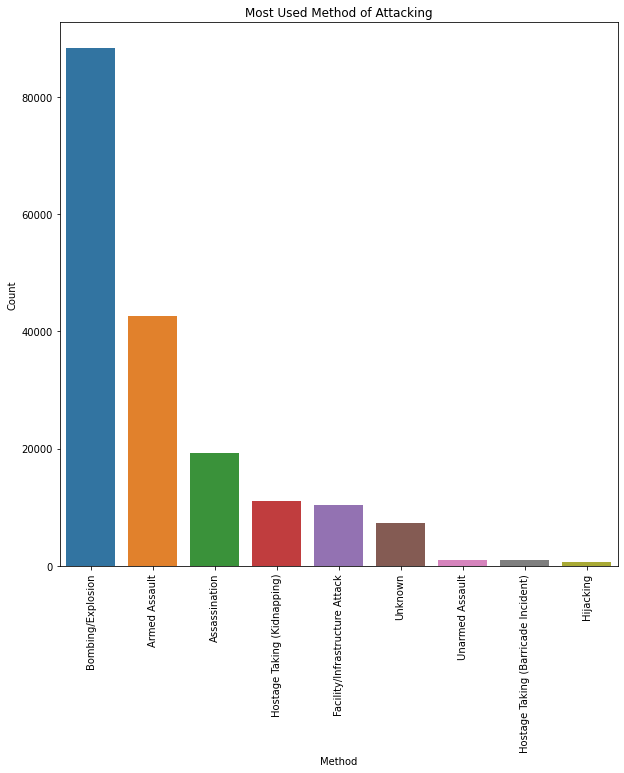

In [130]:
plt.figure(figsize=(10,10))
sns.barplot(df['attacktype'].value_counts().head(10).index,df['attacktype'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('Most Used Method of Attacking')
plt.ylabel('Count')
plt.xlabel('Method')
plt.show();

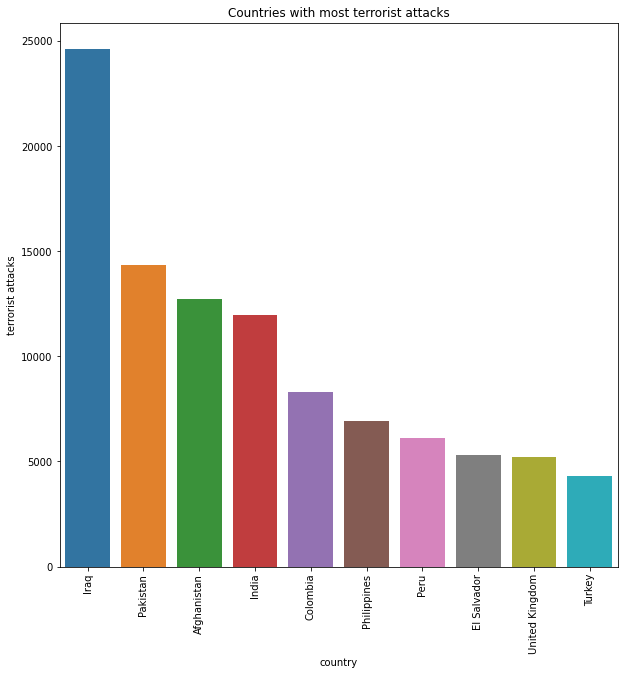

In [131]:
plt.figure(figsize=(10,10))
sns.barplot(df['country'].value_counts().head(10).index,df['country'].value_counts().head(10).values,)
# plt.bar(df['country'].value_counts().head(10).index,df['country'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.xlabel('country')
plt.ylabel('terrorist attacks')
plt.title('Countries with most terrorist attacks')
plt.show()

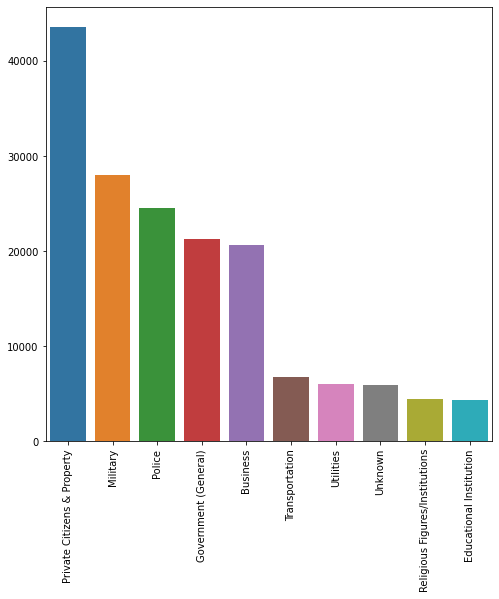

In [132]:
plt.figure(figsize=(8,8))
sns.barplot(df.target.value_counts().head(10).index, df.target.value_counts().head(10).values)
plt.xticks(rotation=90)
plt.show()


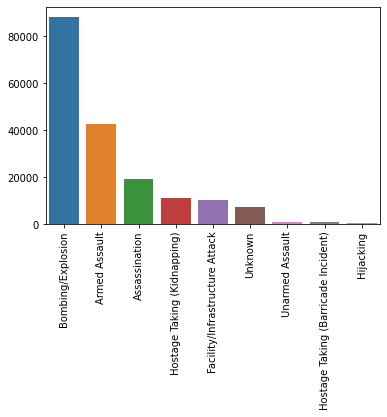

In [133]:
sns.barplot(df['attacktype'].value_counts().head(10).index, df['attacktype'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.show()

In [134]:
df.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'success_rate', 'attacktype', 'target', 'terrorist_organization',
       'weapon', 'killed', 'wounded'],
      dtype='object')

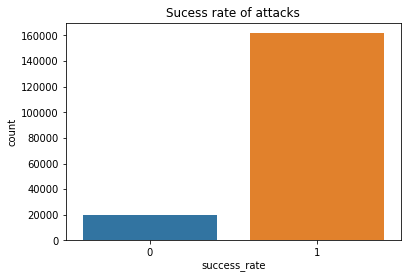

In [135]:
df['success_rate'].value_counts().index
df['success_rate'].value_counts().values
sns.barplot(df['success_rate'].value_counts().index, df['success_rate'].value_counts().values)
plt.ylabel("count")
plt.xlabel("success_rate")
plt.title("Sucess rate of attacks")
plt.show()



In [95]:
success_rate_percent = df[df['success_rate']==1].value_counts().sum()/(df['success_rate'].value_counts().sum())*100
success_rate_percent = round(success_rate_percent)
print(f"{success_rate_percent}% attacks have been successfully carried out by terrorist organization")

89% attacks have been successfully carried out by terrorist organization


In [139]:
df['weapon'] = df['weapon'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'Vehicle')
df['weapon'].value_counts()


Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: weapon, dtype: int64

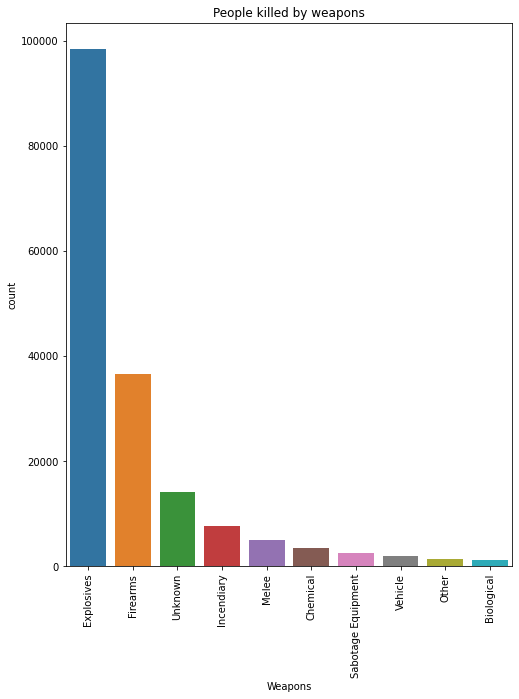

In [140]:
# number of pople killed by any weapon
plt.figure(figsize=(8,10))
sns.barplot(df['weapon'].value_counts().head(10).index, df['killed'].value_counts().head(10).values)
plt.xticks(rotation=90)
plt.title('People killed by weapons')
plt.xlabel('Weapons')
plt.ylabel('count')
plt.show()

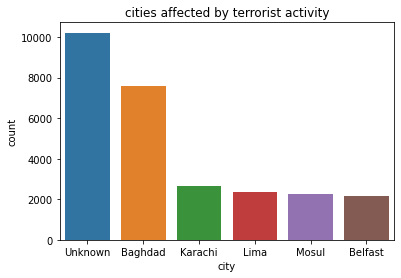

In [145]:
df['city'].value_counts().head(5)
sns.barplot(df['city'].value_counts().head(6).index, df['city'].value_counts().head(6).values)
plt.xlabel("city")
plt.ylabel("count")
plt.title("cities affected by terrorist activity")
plt.show()


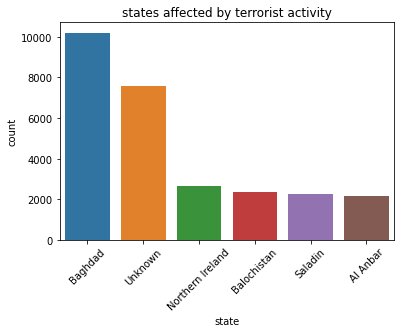

In [149]:
sns.barplot(df['state'].value_counts().head(6).index, df['city'].value_counts().head(6).values)
plt.xlabel("state")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.title("states affected by terrorist activity")
plt.show()